In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# adult = fetch_ucirepo(id=2)

# # data (as pandas dataframes)
# X = adult.data.features
# y = adult.data.targets

# # metadata
# print(adult.metadata)

# # variable information
# print(adult.variables)

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db_file_path = '/content/drive/MyDrive/Colab Notebooks/adult.data'

In [ ]:
data = pd.read_csv(db_file_path)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
data.replace('?', None, inplace=True)
# Remove leading and trailing spaces from all columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.to_csv('/content/drive/MyDrive/Colab Notebooks/adult_new_file.data', index=False)

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Filter data for people earning less than 50K
low_income = data[data["income"] == "<=50K"]

print("Number of records in low_income:", len(low_income))

Number of records in low_income: 24719


In [ ]:
print(data["income"].unique())

['<=50K' '>50K']


**AGE**

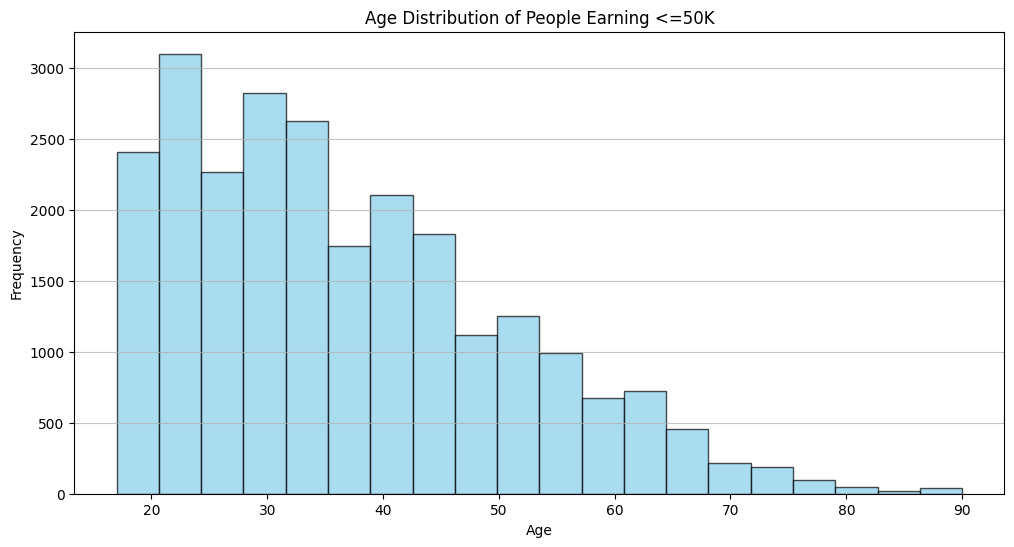

In [ ]:
# Filter data for people earning less than 50K
low_income = data[data["income"] == "<=50K"]

# Plot age distribution
plt.figure(figsize=(12, 6))
plt.hist(low_income["age"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of People Earning <=50K")
plt.grid(axis='y', alpha=0.75)
plt.show()

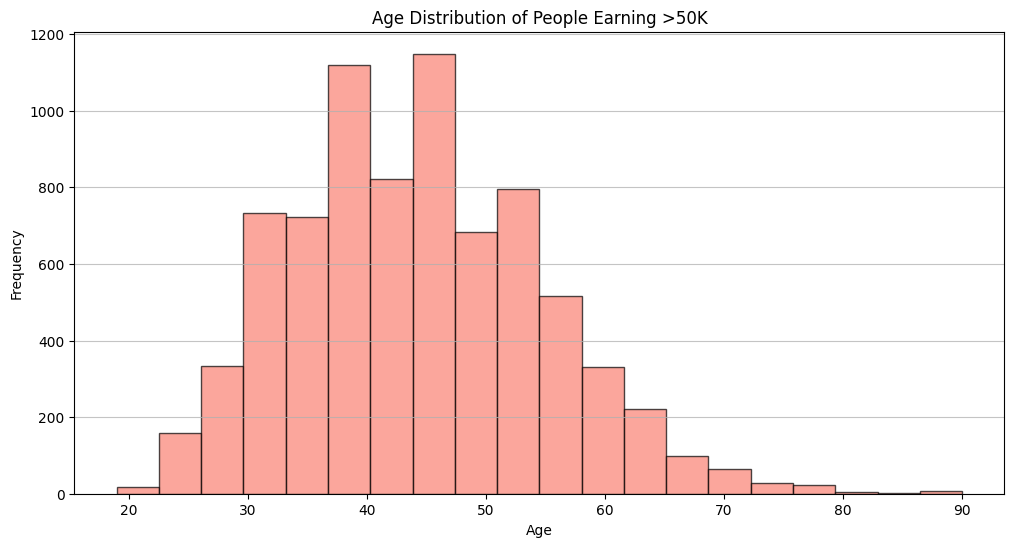

In [ ]:
# Filter data for people earning more than 50K
high_income = data[data["income"] == ">50K"]

# Plot age distribution
# Plotting the relationship between age and income for income > 50K
plt.figure(figsize=(12, 6))
plt.hist(high_income["age"], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of People Earning >50K")
plt.grid(axis='y', alpha=0.75)
plt.show()

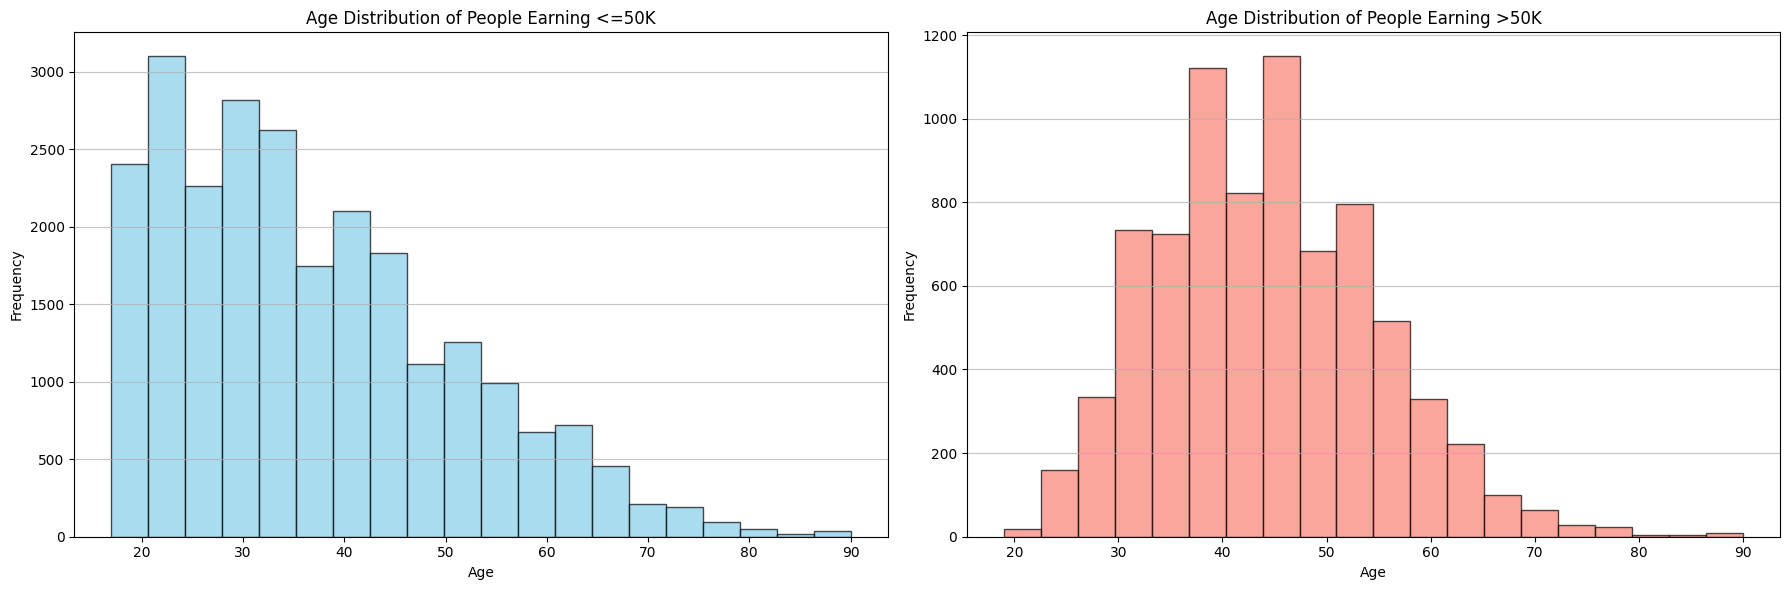

In [ ]:
# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot age distribution for income <=50K
ax1.hist(low_income["age"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.set_title("Age Distribution of People Earning <=50K")
ax1.grid(axis='y', alpha=0.75)

# Plot age distribution for income >50K
ax2.hist(high_income["age"], bins=20, color='salmon', edgecolor='black', alpha=0.7)
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")
ax2.set_title("Age Distribution of People Earning >50K")
ax2.grid(axis='y', alpha=0.75)

# Display the plots
plt.tight_layout()
plt.show()


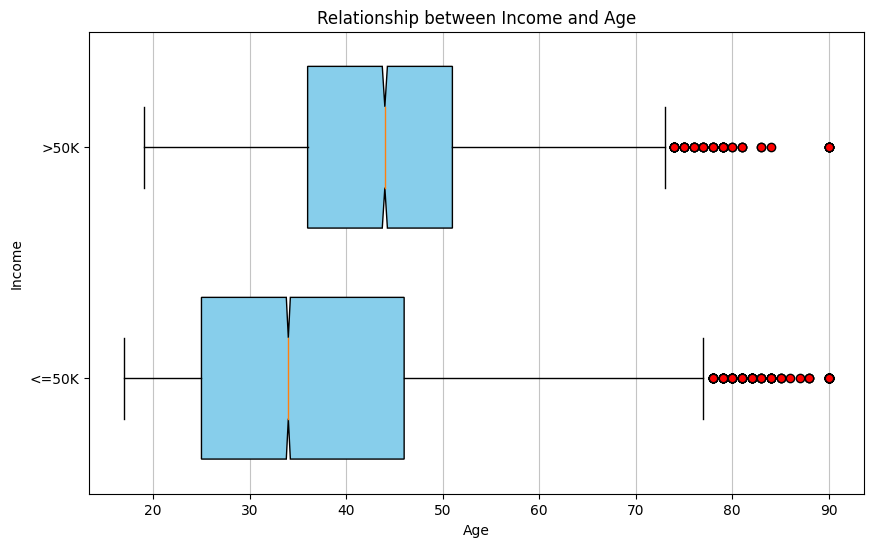

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot to show the relationship between income and age
plt.figure(figsize=(10, 6))
plt.boxplot([low_income["age"], high_income["age"]],
            labels=["<=50K", ">50K"], patch_artist=True, notch=True, vert=False, widths=0.7,
            boxprops=dict(facecolor="skyblue", color="black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Relationship between Income and Age")
plt.grid(axis='x', alpha=0.75)
plt.show()


**RACE**

In [ ]:
# Print the different values of the "race" column
print(data["race"].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


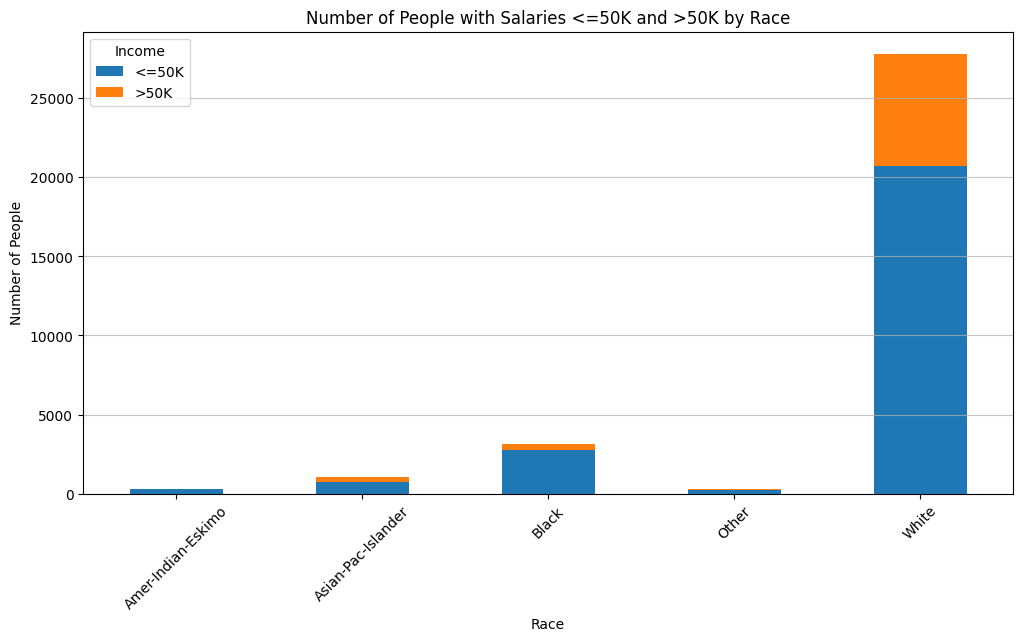

In [ ]:
# Group the data by race and income, and count the number of individuals in each group
race_income_counts = data.groupby(["race", "income"]).size().unstack().fillna(0)

# Create a bar plot
race_income_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Race")
plt.ylabel("Number of People")
plt.title("Number of People with Salaries <=50K and >50K by Race")
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


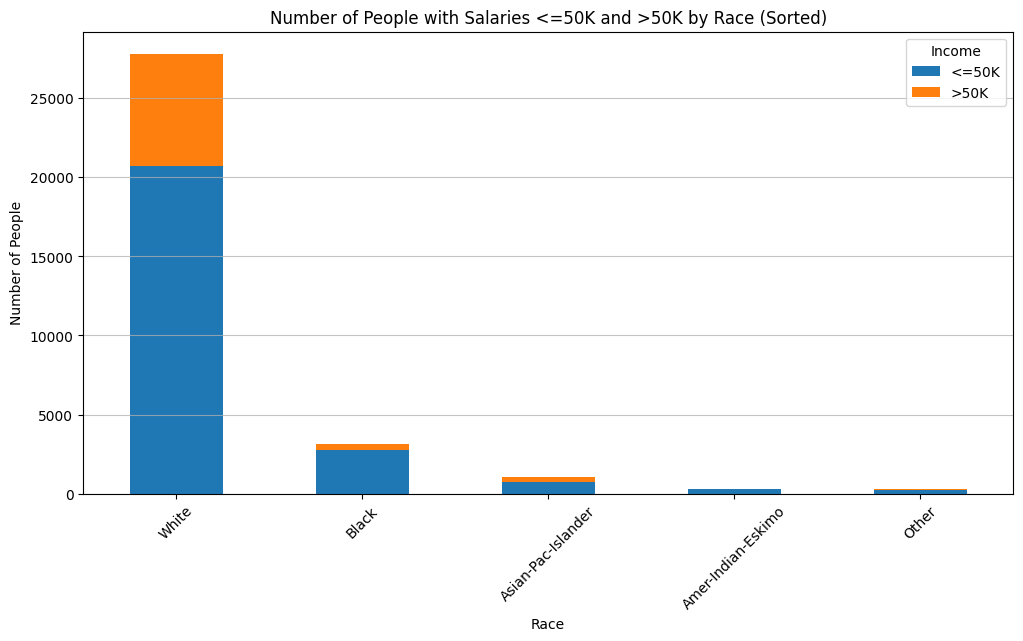

In [ ]:
# Group the data by race and income, and count the number of individuals in each group
race_income_counts = data.groupby(["race", "income"]).size().unstack().fillna(0)

# Calculate the total number of people for each race
race_income_counts["Total"] = race_income_counts.sum(axis=1)

# Sort the DataFrame by the total number of people
race_income_counts_sorted = race_income_counts.sort_values(by="Total", ascending=False).drop("Total", axis=1)

# Create a bar plot
race_income_counts_sorted.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Race")
plt.ylabel("Number of People")
plt.title("Number of People with Salaries <=50K and >50K by Race (Sorted)")
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

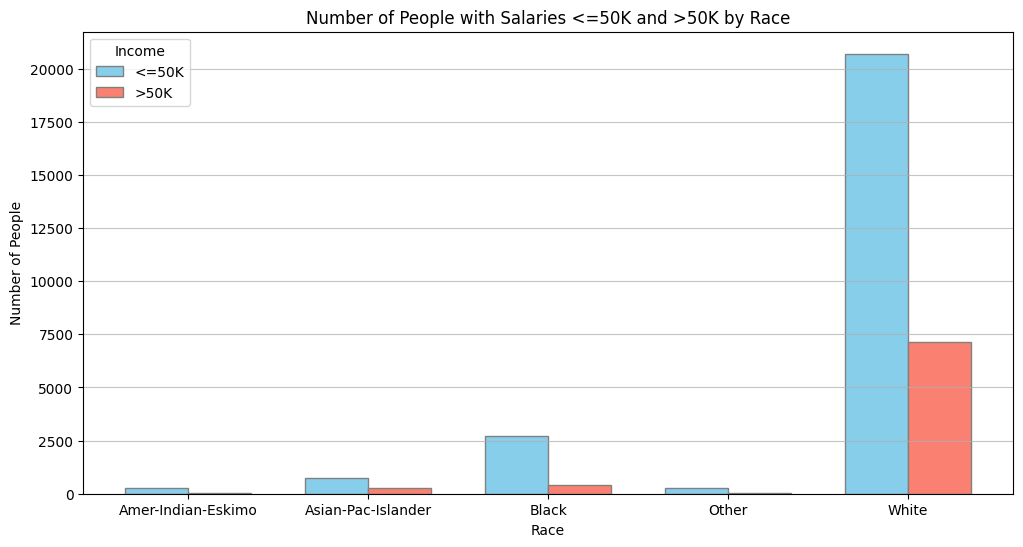

In [ ]:
# Group the data by race and income, and count the number of individuals in each group
race_income_counts = data.groupby(["race", "income"]).size().unstack().fillna(0)

# Get the races and income categories
races = race_income_counts.index
income_categories = race_income_counts.columns

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(races))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, race_income_counts["<=50K"], color='skyblue', width=bar_width, edgecolor='grey', label='<=50K')
plt.bar(r2, race_income_counts[">50K"], color='salmon', width=bar_width, edgecolor='grey', label='>50K')

# Add labels, title, and legend
plt.xlabel('Race')
plt.ylabel('Number of People')
plt.title('Number of People with Salaries <=50K and >50K by Race')
plt.xticks([r + bar_width/2 for r in range(len(races))], races)
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.grid(axis='y', alpha=0.75)
plt.show()


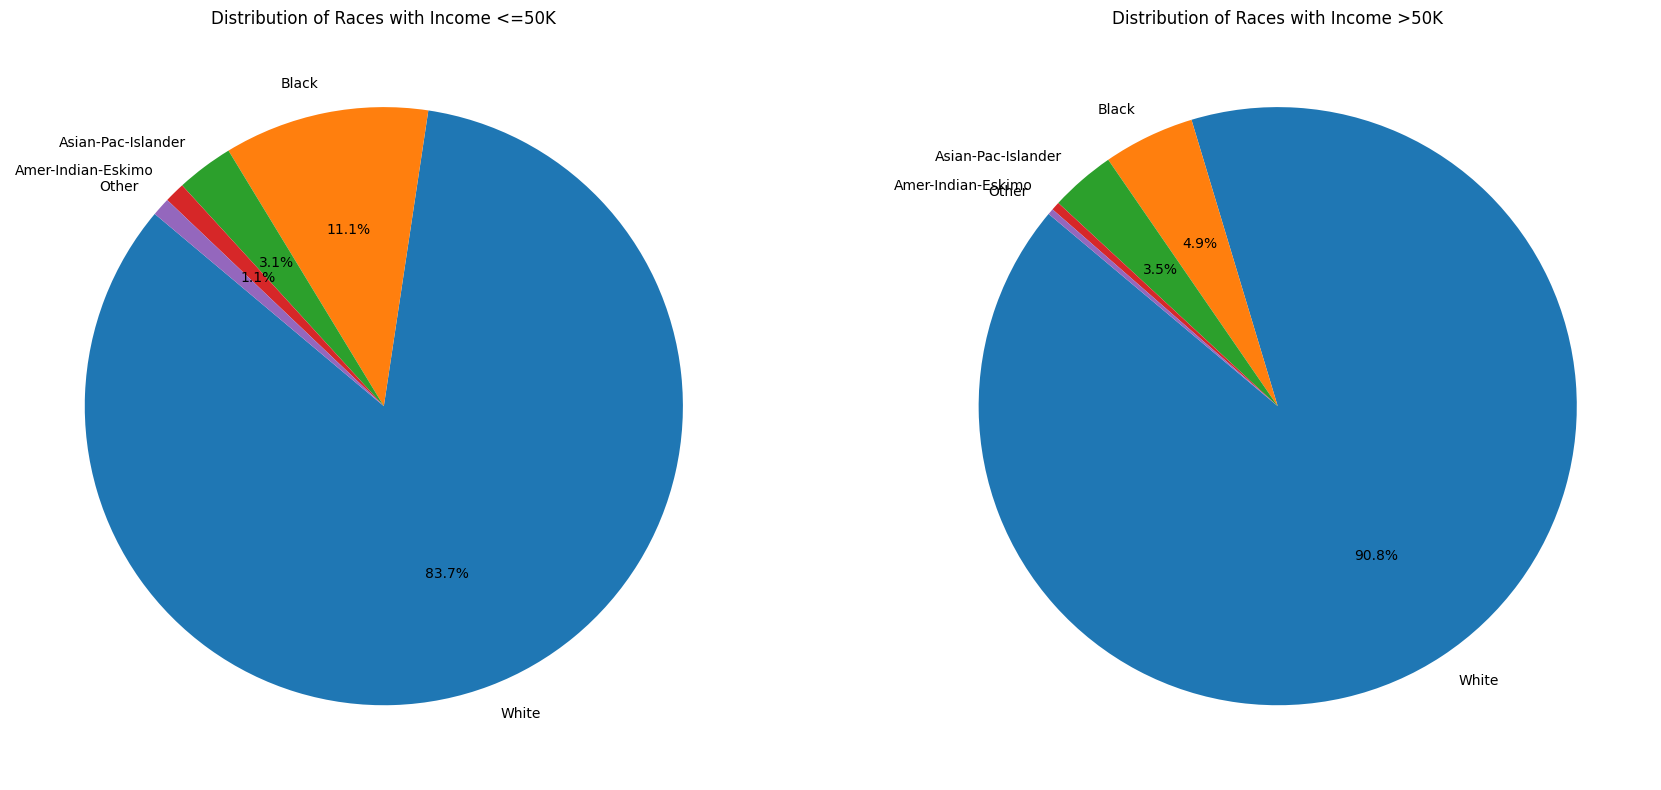

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of individuals for each income category
total_counts_low = low_income["race"].value_counts()
total_counts_high = high_income["race"].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Create a pie chart for income <=50K
ax1.pie(total_counts_low, labels=total_counts_low.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=140)
ax1.set_title('Distribution of Races with Income <=50K')

# Create a pie chart for income >50K
ax2.pie(total_counts_high, labels=total_counts_high.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=140)
ax2.set_title('Distribution of Races with Income >50K')

plt.tight_layout()
plt.show()


**Distribution of capital gain and education years**

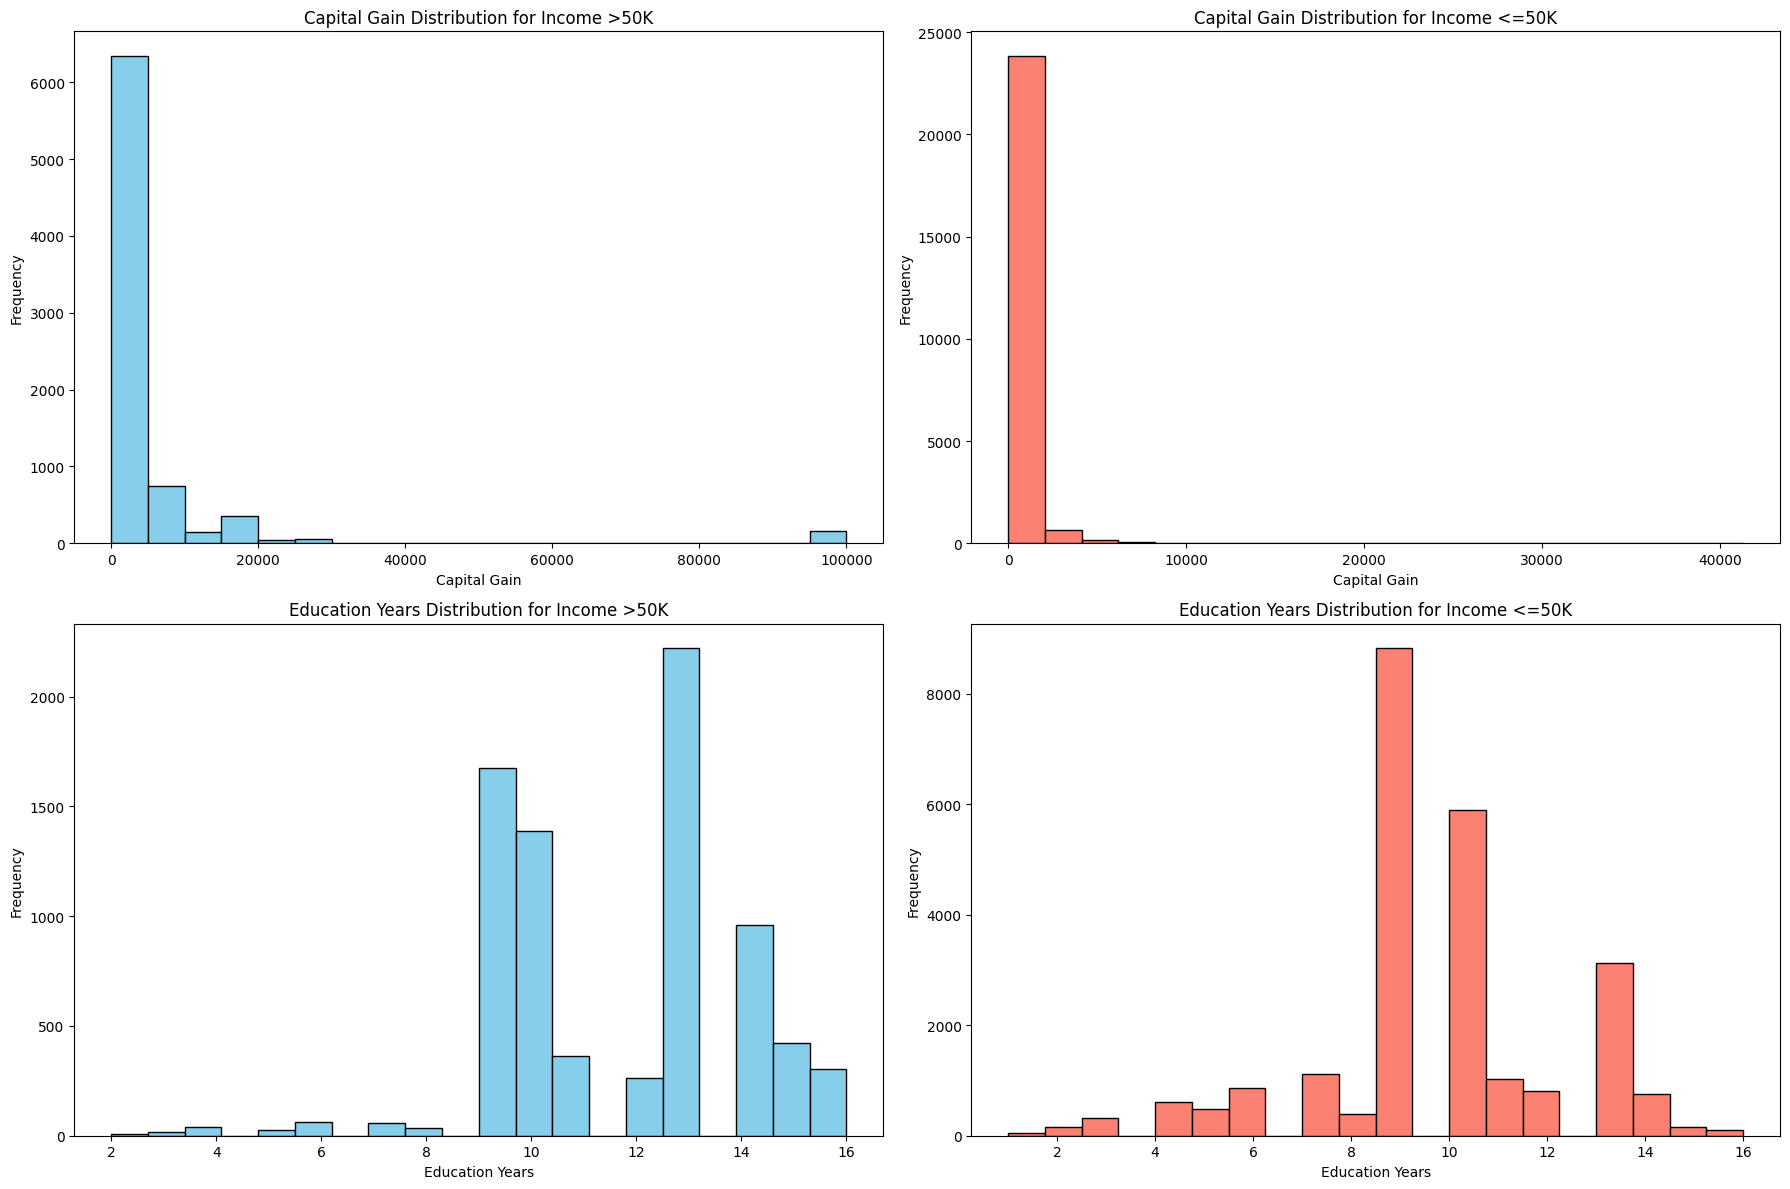

In [ ]:
# Filter data for people earning more than 50K
high_income = data[data["income"] == ">50K"]

# Filter data for people earning less than or equal to 50K
low_income = data[data["income"] == "<=50K"]

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot for capital gain of people earning more than 50K
axs[0, 0].hist(high_income["capital-gain"], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Capital Gain Distribution for Income >50K")
axs[0, 0].set_xlabel("Capital Gain")
axs[0, 0].set_ylabel("Frequency")

# Plot for capital gain of people earning less than or equal to 50K
axs[0, 1].hist(low_income["capital-gain"], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title("Capital Gain Distribution for Income <=50K")
axs[0, 1].set_xlabel("Capital Gain")
axs[0, 1].set_ylabel("Frequency")

# Plot for education years of people earning more than 50K
axs[1, 0].hist(high_income["education-num"], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Education Years Distribution for Income >50K")
axs[1, 0].set_xlabel("Education Years")
axs[1, 0].set_ylabel("Frequency")

# Plot for education years of people earning less than or equal to 50K
axs[1, 1].hist(low_income["education-num"], bins=20, color='salmon', edgecolor='black')
axs[1, 1].set_title("Education Years Distribution for Income <=50K")
axs[1, 1].set_xlabel("Education Years")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

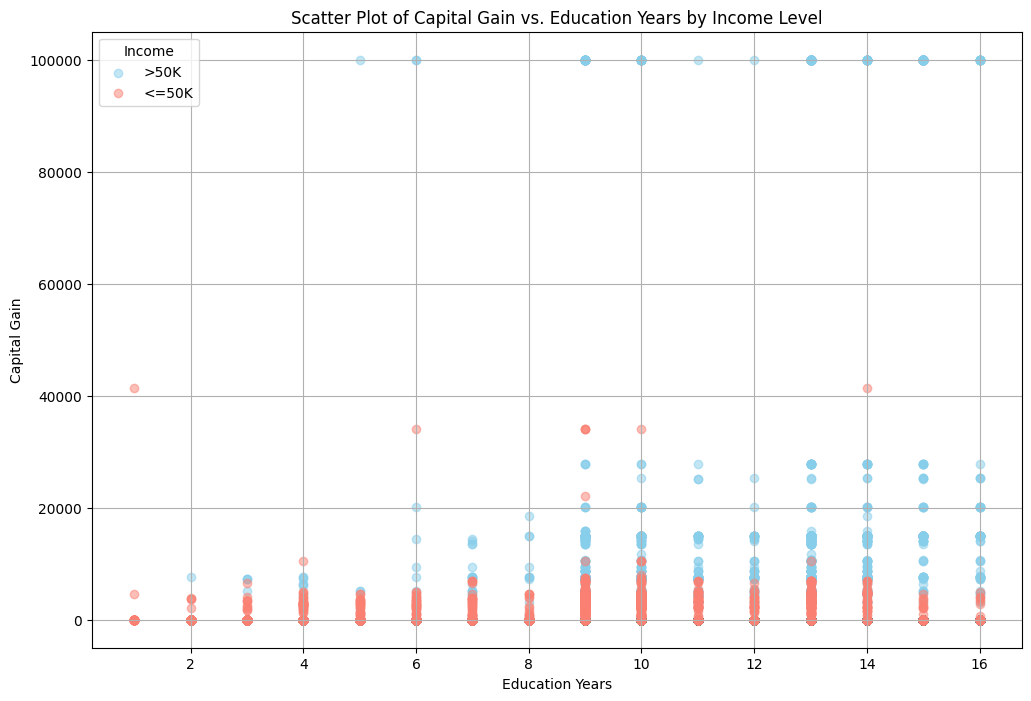

In [ ]:
# Create a scatter plot of capital gain vs. education years
plt.figure(figsize=(12, 8))
plt.scatter(data[data["income"] == ">50K"]["education-num"], data[data["income"] == ">50K"]["capital-gain"], color='skyblue', label='>50K', alpha=0.5)
plt.scatter(data[data["income"] == "<=50K"]["education-num"], data[data["income"] == "<=50K"]["capital-gain"], color='salmon', label='<=50K', alpha=0.5)
plt.xlabel("Education Years")
plt.ylabel("Capital Gain")
plt.title("Scatter Plot of Capital Gain vs. Education Years by Income Level")
plt.legend(title="Income")
plt.grid(True)
plt.show()


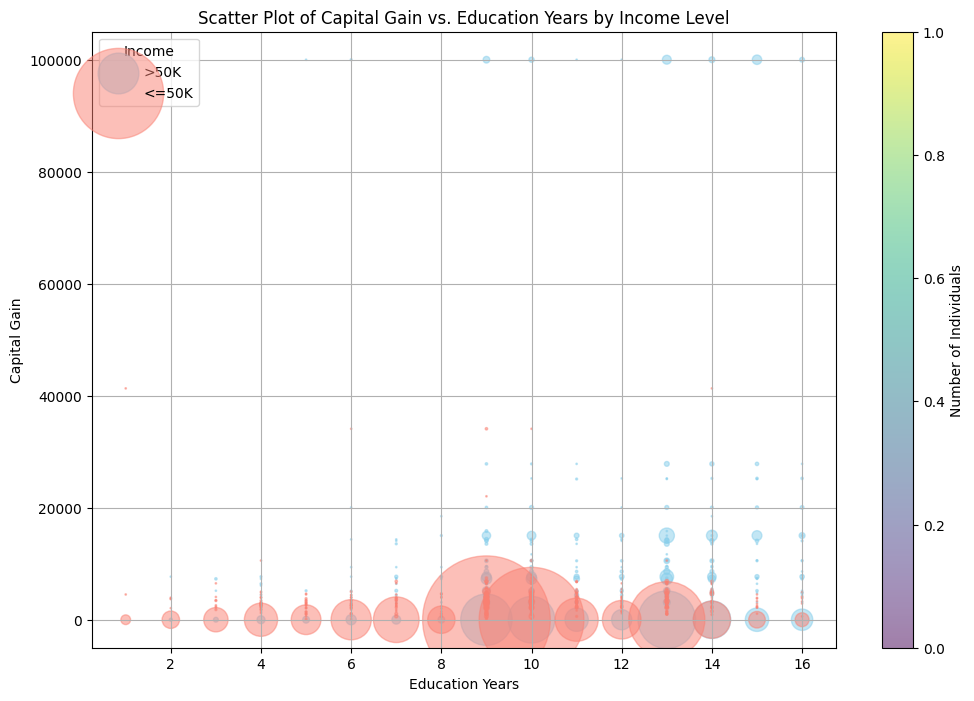

In [ ]:
# Group data by education years and capital gain, and count the number of occurrences
high_income_counts = high_income.groupby(["education-num", "capital-gain"]).size()
low_income_counts = low_income.groupby(["education-num", "capital-gain"]).size()

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(high_income_counts.index.get_level_values(0),  # Education years
            high_income_counts.index.get_level_values(1),  # Capital gain
            s=high_income_counts.values,  # Marker size based on count
            c='skyblue', alpha=0.5, label='>50K')
plt.scatter(low_income_counts.index.get_level_values(0),  # Education years
            low_income_counts.index.get_level_values(1),  # Capital gain
            s=low_income_counts.values,  # Marker size based on count
            c='salmon', alpha=0.5, label='<=50K')
plt.xlabel("Education Years")
plt.ylabel("Capital Gain")
plt.title("Scatter Plot of Capital Gain vs. Education Years by Income Level")
plt.legend(title="Income")

# Add a color bar
cb = plt.colorbar()
cb.set_label('Number of Individuals')

plt.grid(True)
plt.show()


**hours worked per week, marital status, and number of years of education vs income**

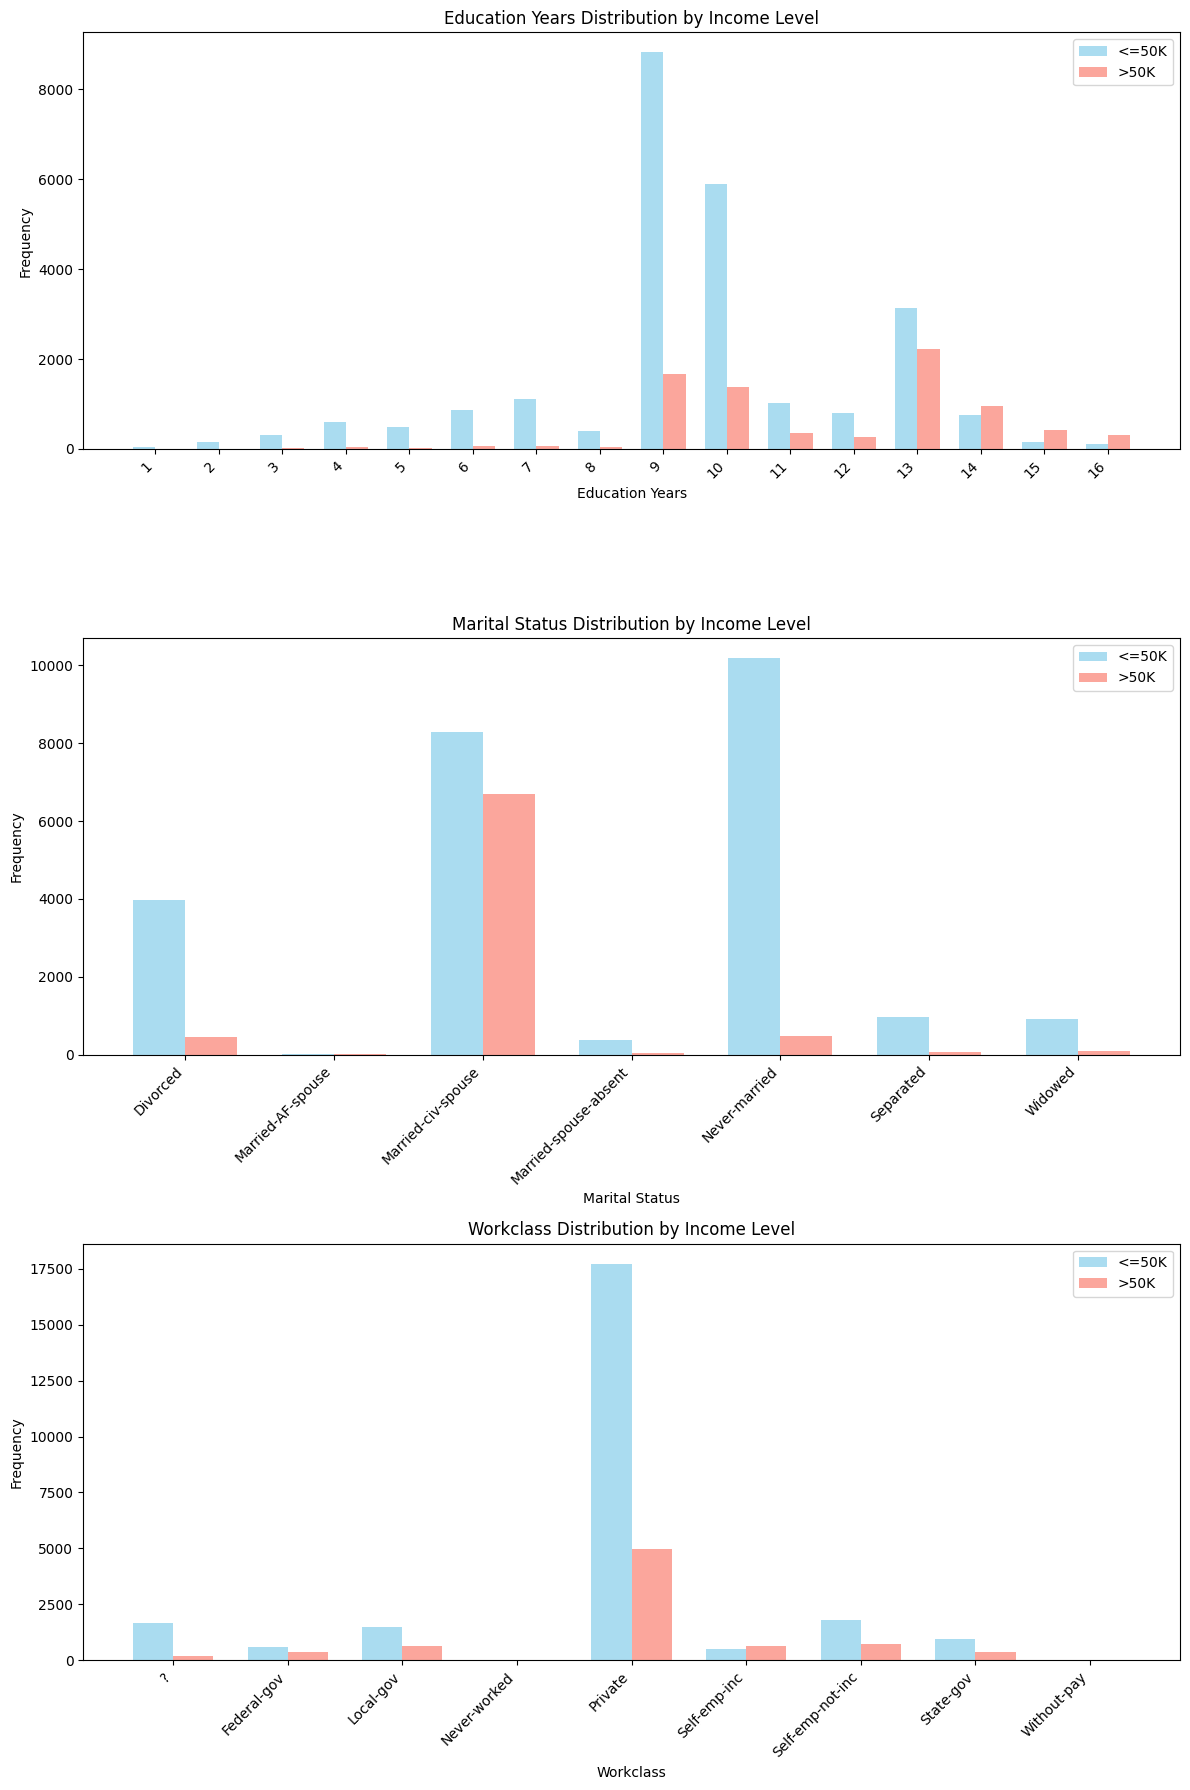

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for individuals earning less than or equal to $50,000 per year
low_income_data = data[data["income"] == "<=50K"]
high_income_data = data[data["income"] == ">50K"]

# Get unique categories for education, marital status, and workclass
education_categories = np.union1d(low_income_data["education-num"].unique(), high_income_data["education-num"].unique())
marital_status_categories = np.union1d(low_income_data["marital-status"].unique(), high_income_data["marital-status"].unique())
workclass_categories = np.union1d(low_income_data["workclass"].unique(), high_income_data["workclass"].unique())

# Grouped bar plot for education, marital status, and workclass
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Education
education_counts_low = low_income_data["education-num"].value_counts().reindex(education_categories, fill_value=0)
education_counts_high = high_income_data["education-num"].value_counts().reindex(education_categories, fill_value=0)
width = 0.35  # Width of the bars
x = np.arange(len(education_categories))
axs[0].bar(x - width/2, education_counts_low.values, width, color='skyblue', alpha=0.7, label="<=50K")
axs[0].bar(x + width/2, education_counts_high.values, width, color='salmon', alpha=0.7, label=">50K")
axs[0].set_xlabel("Education Years")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Education Years Distribution by Income Level")
axs[0].set_xticks(x)
axs[0].set_xticklabels(education_categories, rotation=45, ha="right")
axs[0].legend()

# Marital status
marital_status_counts_low = low_income_data["marital-status"].value_counts().reindex(marital_status_categories, fill_value=0)
marital_status_counts_high = high_income_data["marital-status"].value_counts().reindex(marital_status_categories, fill_value=0)
width = 0.35  # Width of the bars
x = np.arange(len(marital_status_categories))
axs[1].bar(x - width/2, marital_status_counts_low.values, width, color='skyblue', alpha=0.7, label="<=50K")
axs[1].bar(x + width/2, marital_status_counts_high.values, width, color='salmon', alpha=0.7, label=">50K")
axs[1].set_xlabel("Marital Status")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Marital Status Distribution by Income Level")
axs[1].set_xticks(x)
axs[1].set_xticklabels(marital_status_categories, rotation=45, ha="right")
axs[1].legend()

# Workclass
workclass_counts_low = low_income_data["workclass"].value_counts().reindex(workclass_categories, fill_value=0)
workclass_counts_high = high_income_data["workclass"].value_counts().reindex(workclass_categories, fill_value=0)
width = 0.35  # Width of the bars
x = np.arange(len(workclass_categories))
axs[2].bar(x - width/2, workclass_counts_low.values, width, color='skyblue', alpha=0.7, label="<=50K")
axs[2].bar(x + width/2, workclass_counts_high.values, width, color='salmon', alpha=0.7, label=">50K")
axs[2].set_xlabel("Workclass")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Workclass Distribution by Income Level")
axs[2].set_xticks(x)
axs[2].set_xticklabels(workclass_categories, rotation=45, ha="right")
axs[2].legend()

plt.tight_layout()
plt.show()


<ipython-input-60-a836a6e4f837>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['income_num'] = subset_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
<ipython-input-60-a836a6e4f837>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['marital-status'] = subset_data['marital-status'].astype('category').cat.codes


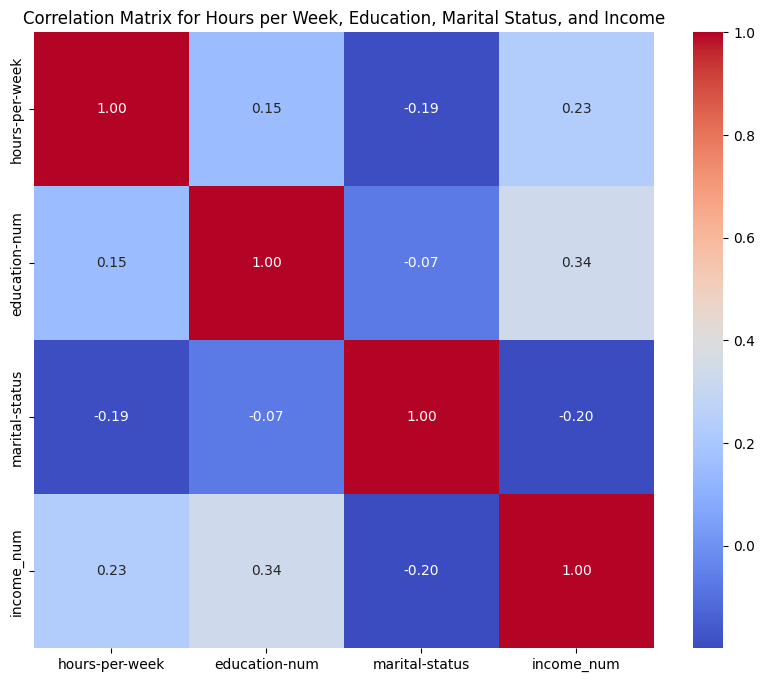

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
subset_data = data[['hours-per-week', 'education-num', 'marital-status', 'income']]

# Convert 'income' to numeric for visualization
subset_data['income_num'] = subset_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

# Convert 'marital-status' to categorical codes
subset_data['marital-status'] = subset_data['marital-status'].astype('category').cat.codes

# Calculate the correlation matrix
corr = subset_data[['hours-per-week', 'education-num', 'marital-status', 'income_num']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Hours per Week, Education, Marital Status, and Income')
plt.show()


<ipython-input-61-2c543c18320a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['income_num'] = subset_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
<ipython-input-61-2c543c18320a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['marital-status'] = subset_data['marital-status'].astype('category').cat.codes
<ipython-input-61-2c543c18320a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

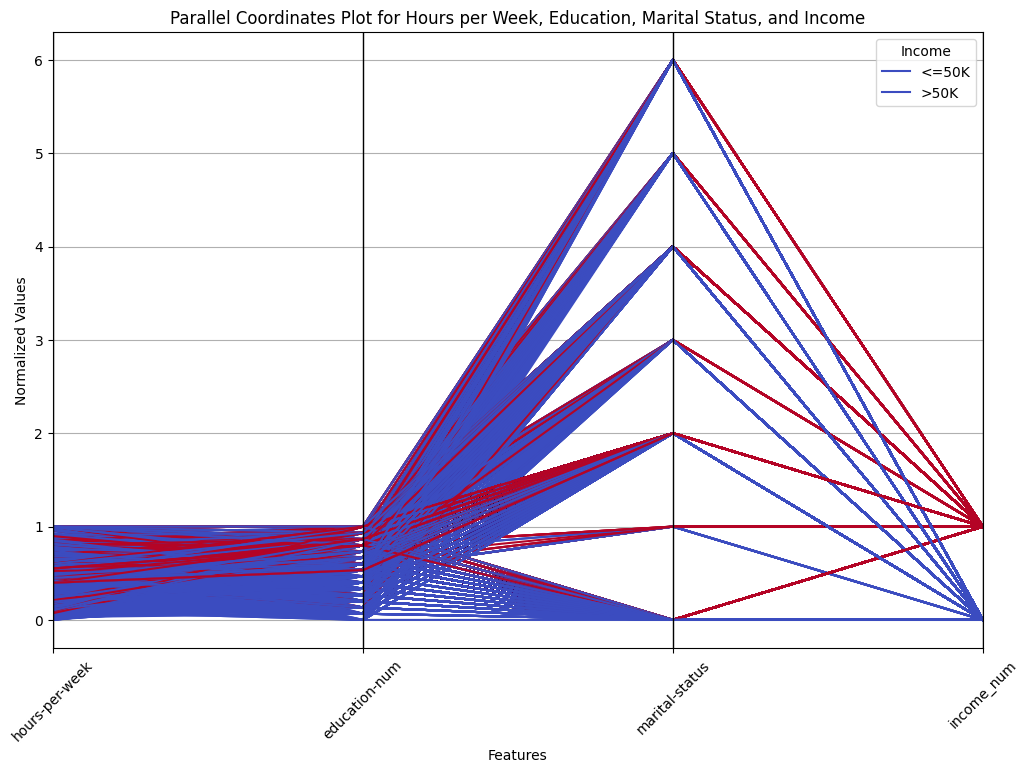

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Select the columns of interest
subset_data = data[['hours-per-week', 'education-num', 'marital-status', 'income']]

# Convert 'income' to numeric for visualization
subset_data['income_num'] = subset_data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

# Convert 'marital-status' to categorical codes
subset_data['marital-status'] = subset_data['marital-status'].astype('category').cat.codes

# Normalize the numerical columns for better visualization
numerical_columns = ['hours-per-week', 'education-num']
subset_data[numerical_columns] = (subset_data[numerical_columns] - subset_data[numerical_columns].min()) / (subset_data[numerical_columns].max() - subset_data[numerical_columns].min())

# Create a parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, 'income', colormap='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.title('Parallel Coordinates Plot for Hours per Week, Education, Marital Status, and Income')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()


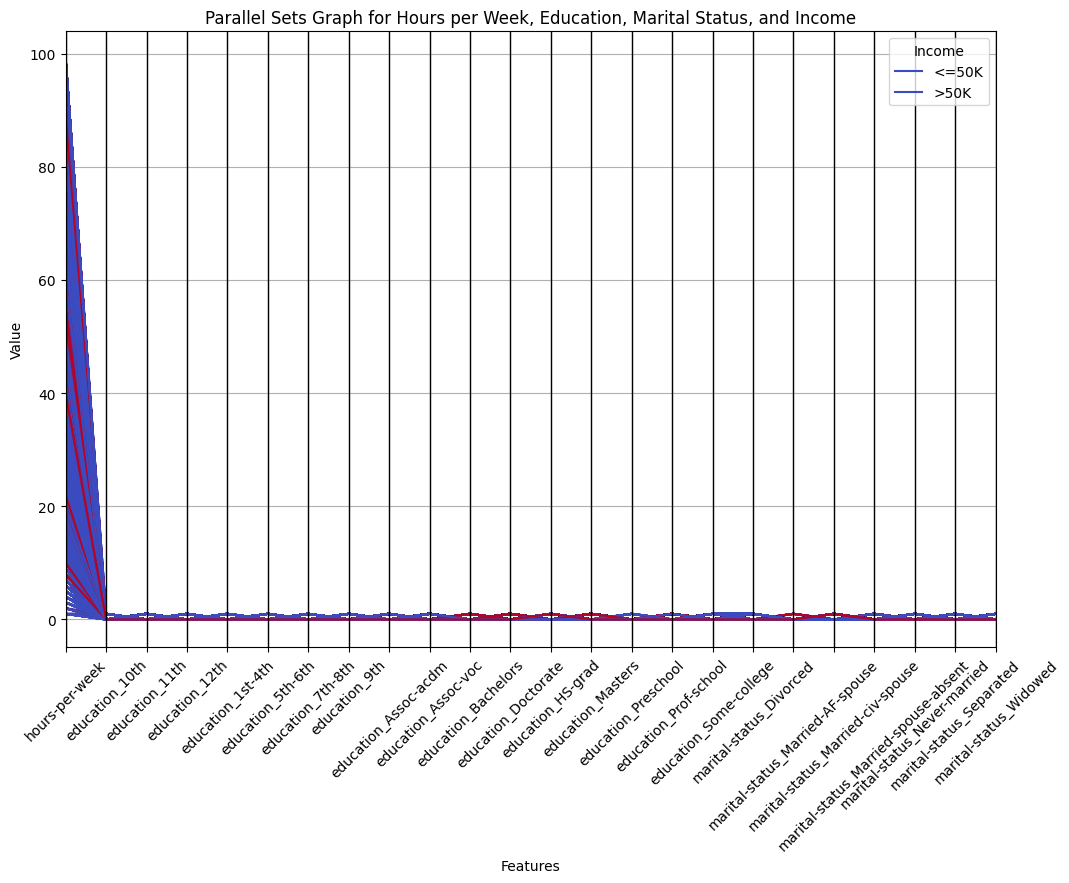

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Select the columns of interest
subset_data = data[['hours-per-week', 'education', 'marital-status', 'income']]

# One-hot encode the 'education' and 'marital-status' columns
subset_data = pd.get_dummies(subset_data, columns=['education', 'marital-status'])

# Create a parallel sets graph
plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, 'income', colormap='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Parallel Sets Graph for Hours per Week, Education, Marital Status, and Income')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()


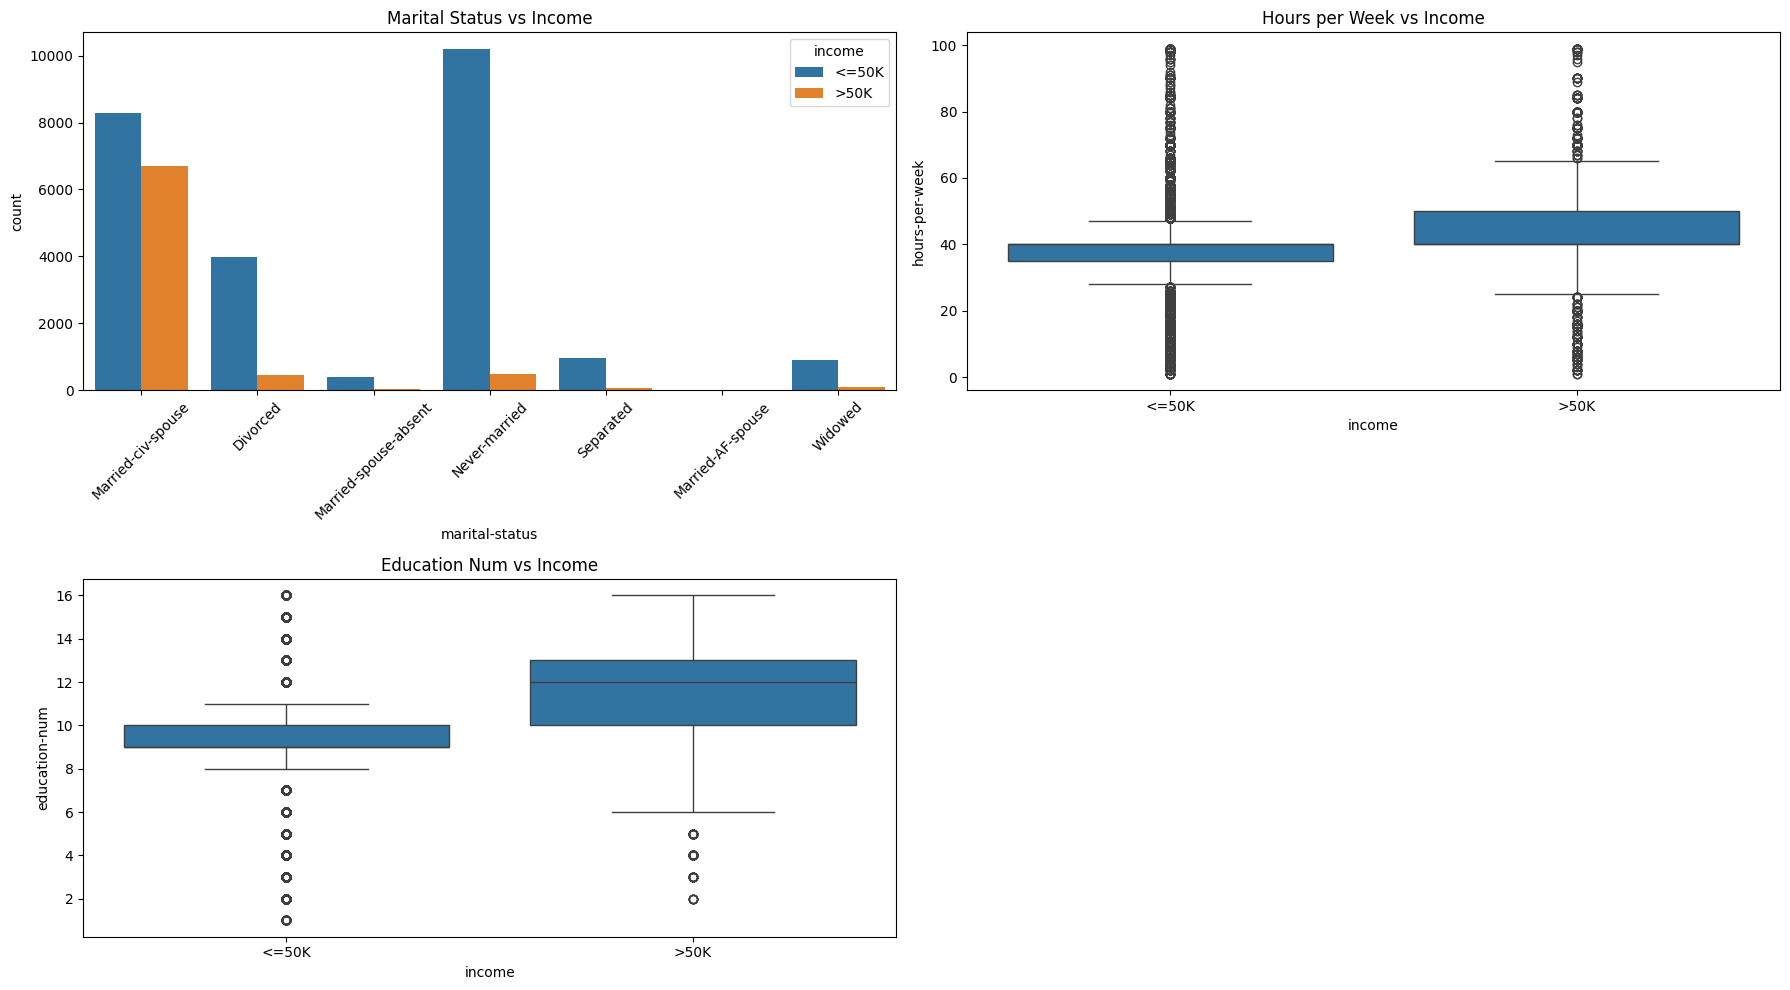

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 10))

# Plot 1: Bar plot for marital status vs income
plt.subplot(2, 2, 1)
sns.countplot(x='marital-status', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Marital Status vs Income')

# Plot 2: Box plot for hours-per-week vs income
plt.subplot(2, 2, 2)
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs Income')

# Plot 3: Box plot for education-num vs income
plt.subplot(2, 2, 3)
sns.boxplot(x='income', y='education-num', data=data)
plt.title('Education Num vs Income')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**hours-per-week, work-class and income(salary)**

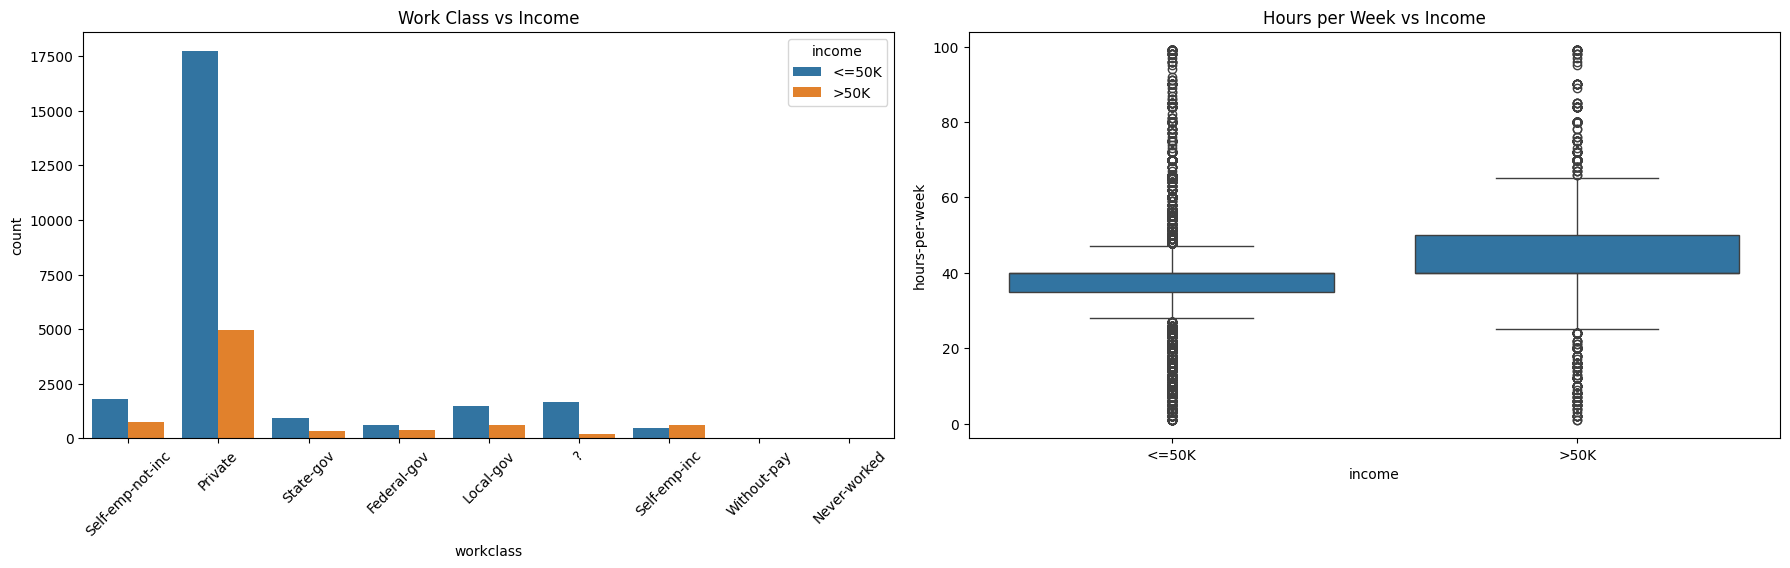

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 10))

# Plot 1: Bar plot for work-class vs income
plt.subplot(2, 2, 1)
sns.countplot(x='workclass', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Work Class vs Income')

# Plot 2: Box plot for hours-per-week vs income
plt.subplot(2, 2, 2)
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs Income')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


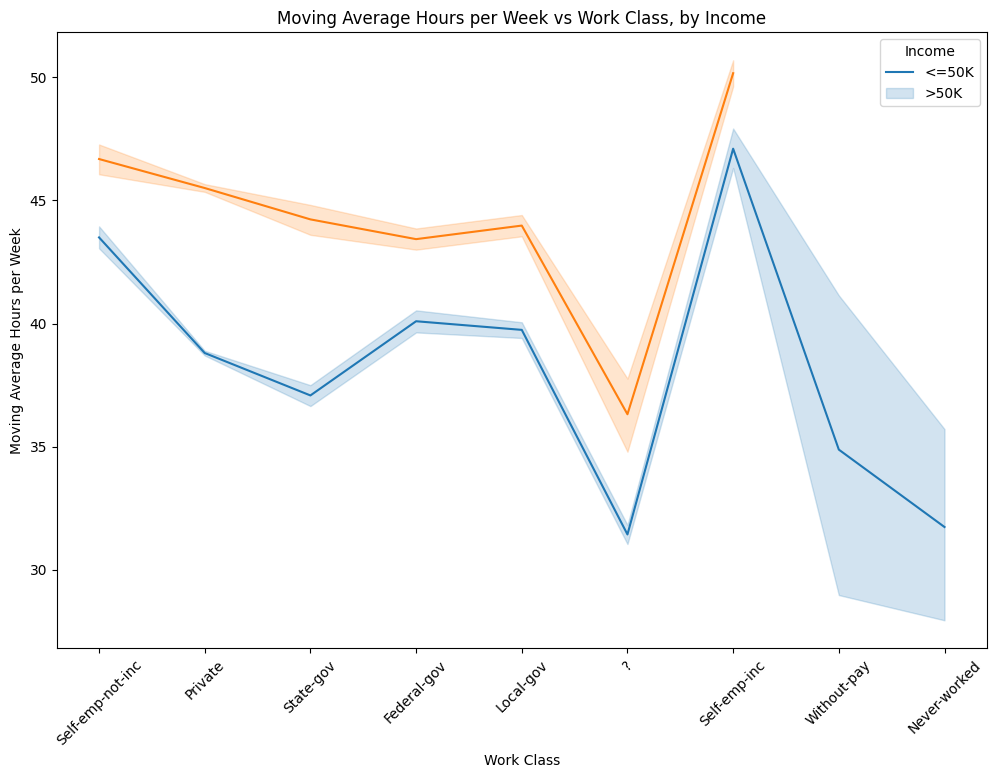

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the moving average of hours-per-week for each work-class and income level
data['moving_avg'] = data.groupby(['workclass', 'income'])['hours-per-week'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set the figure size
plt.figure(figsize=(12, 8))

# Line plot for moving average of hours-per-week vs work-class, with income as hue
sns.lineplot(x='workclass', y='moving_avg', hue='income', data=data)
plt.xticks(rotation=45)
plt.xlabel('Work Class')
plt.ylabel('Moving Average Hours per Week')
plt.title('Moving Average Hours per Week vs Work Class, by Income')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])

# Show the plot
plt.show()


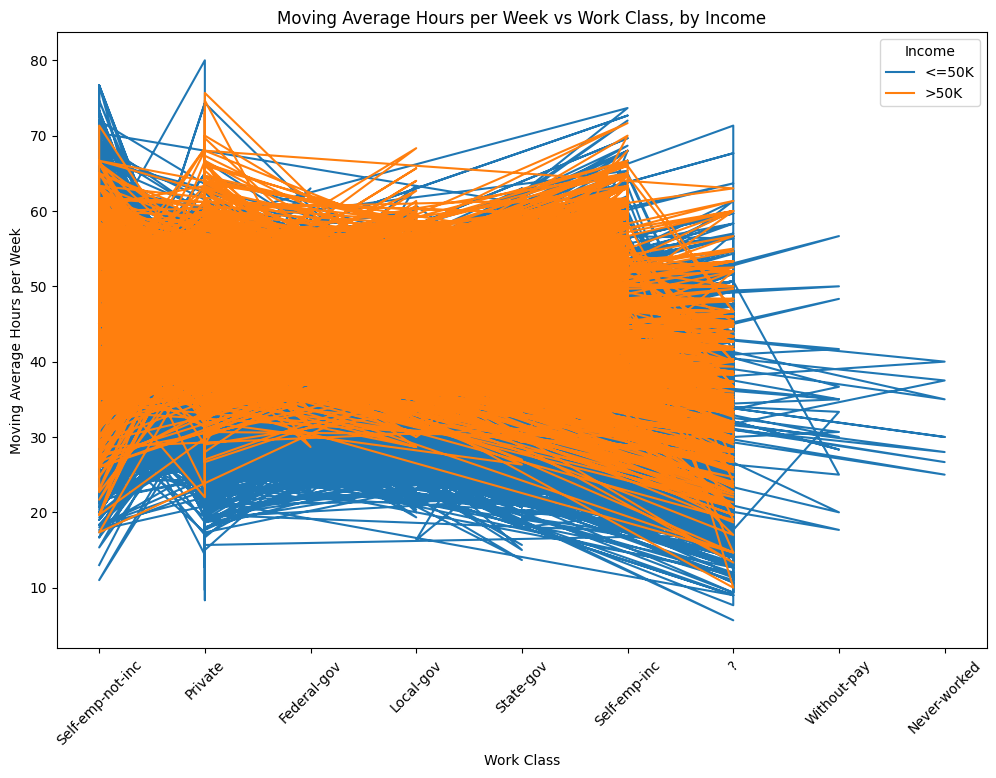

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing values in the 'workclass' column
data_cleaned = data.dropna(subset=['workclass'])

# Calculate the moving average of hours-per-week for each work-class and income level
data_cleaned['moving_avg'] = data_cleaned.groupby(['workclass', 'income'])['hours-per-week'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the moving average for income <=50K
plt.plot(data_cleaned[data_cleaned['income'] == '<=50K']['workclass'], data_cleaned[data_cleaned['income'] == '<=50K']['moving_avg'], label='<=50K')
# Plot the moving average for income >50K
plt.plot(data_cleaned[data_cleaned['income'] == '>50K']['workclass'], data_cleaned[data_cleaned['income'] == '>50K']['moving_avg'], label='>50K')

plt.xlabel('Work Class')
plt.ylabel('Moving Average Hours per Week')
plt.title('Moving Average Hours per Week vs Work Class, by Income')
plt.legend(title='Income', loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
data['workclass'] = data['workclass'].replace('?', None)


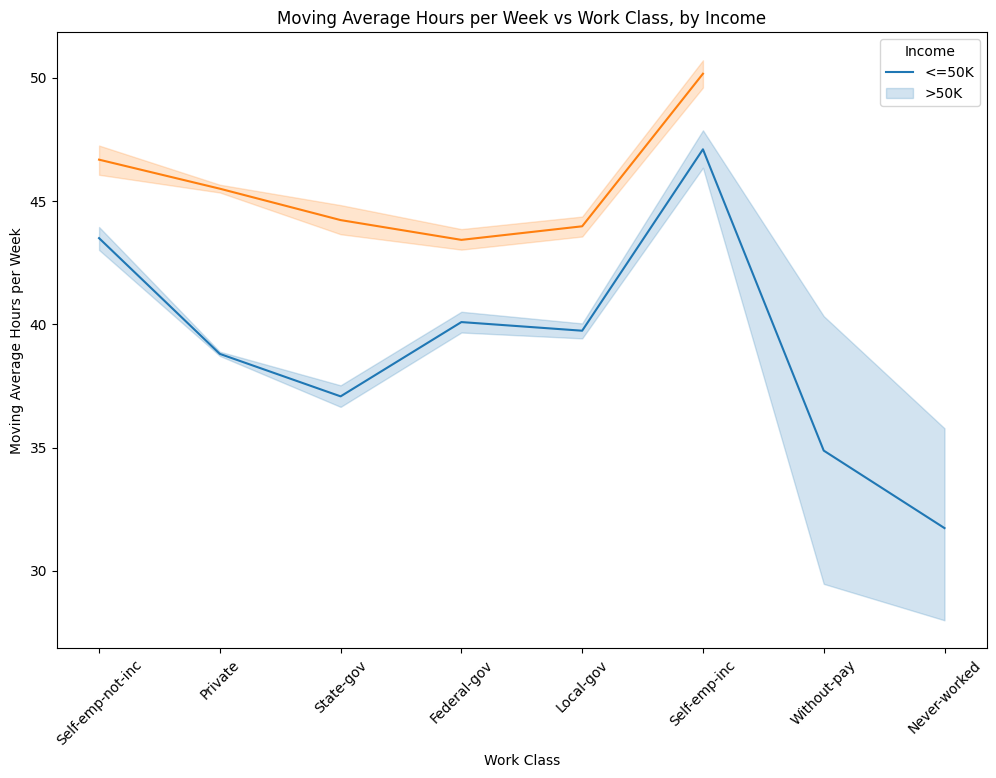

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the moving average of hours-per-week for each work-class and income level
data['moving_avg'] = data.groupby(['workclass', 'income'])['hours-per-week'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set the figure size
plt.figure(figsize=(12, 8))

# Line plot for moving average of hours-per-week vs work-class, with income as hue
sns.lineplot(x='workclass', y='moving_avg', hue='income', data=data)
plt.xticks(rotation=45)
plt.xlabel('Work Class')
plt.ylabel('Moving Average Hours per Week')
plt.title('Moving Average Hours per Week vs Work Class, by Income')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])

# Show the plot
plt.show()


<ipython-input-68-201cc48b13bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['moving_avg'] = data_cleaned.groupby(['workclass', 'income'])['hours-per-week'].transform(lambda x: x.rolling(3, min_periods=1).mean())


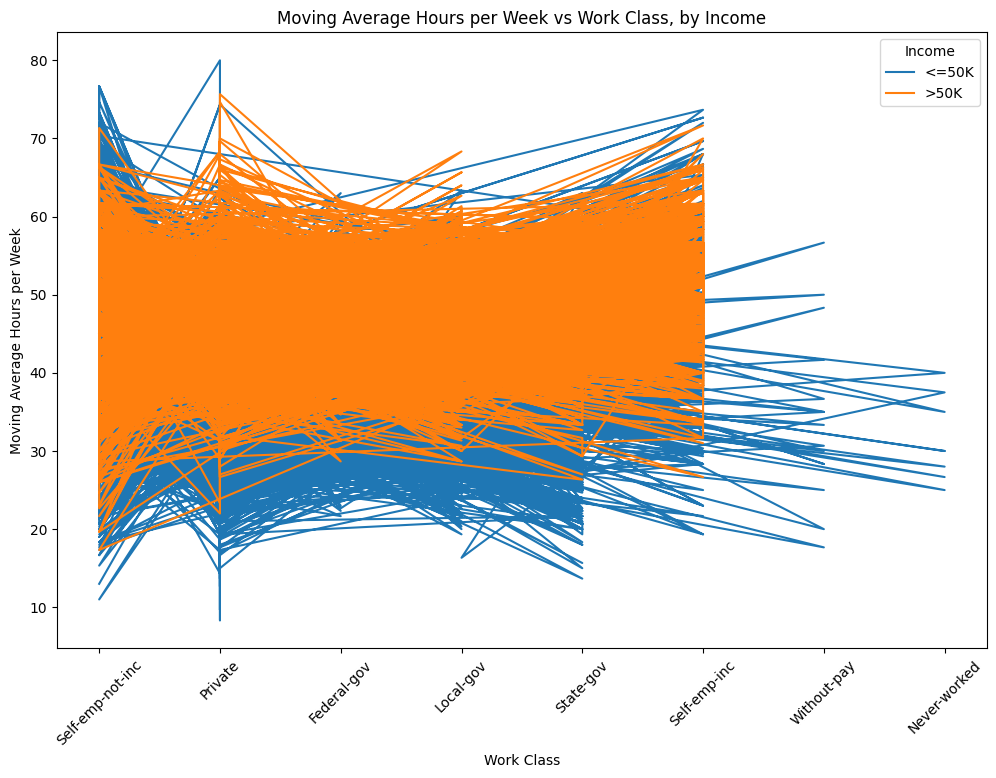

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with missing values in the 'workclass' column
data_cleaned = data.dropna(subset=['workclass'])

# Calculate the moving average of hours-per-week for each work-class and income level
data_cleaned['moving_avg'] = data_cleaned.groupby(['workclass', 'income'])['hours-per-week'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the moving average for income <=50K
plt.plot(data_cleaned[data_cleaned['income'] == '<=50K']['workclass'], data_cleaned[data_cleaned['income'] == '<=50K']['moving_avg'], label='<=50K')
# Plot the moving average for income >50K
plt.plot(data_cleaned[data_cleaned['income'] == '>50K']['workclass'], data_cleaned[data_cleaned['income'] == '>50K']['moving_avg'], label='>50K')

plt.xlabel('Work Class')
plt.ylabel('Moving Average Hours per Week')
plt.title('Moving Average Hours per Week vs Work Class, by Income')
plt.legend(title='Income', loc='upper right')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()
